## Data 1 :Local Area Unemployment Statistics: Beginning 1976

The Local Area Unemployment Statistics program estimates labor force statistics (labor force, employed, unemployment, unemployment rate) for New York State civilian labor force aged 16 and up. Areas covered include, New York State, New York City, Balance of State, Metropolitan Statistical Areas, Counties, Labor Market Regions, Workforce Investment Board Areas, and cities and towns with populations of 25,000 or more. Data are not seasonally adjusted. Civilian labor force data do not include military, prison inmate, or other institutional populations.

Source : https://data.ny.gov/Economic-Development/Local-Area-Unemployment-Statistics-Beginning-1976/5hyu-bdh8
Direct Link : https://data.ny.gov/api/views/5hyu-bdh8/rows.csv?accessType=DOWNLOAD&sorting=true

Size: 79452 rows × 7 columns , 3,499 KB

The columns are Area,Year, Month, Labor, Force, Employed, Unemployed, Unemployment Rate

## Data 2 : Unemployment Insurance Initial Claims Statewide By Month: Beginning 1971

The Dataset contains monthly counts, from 1971 to present, of initial claims for regular unemployment insurance benefits.
Initial Claims include new claims as well as subsequent additional claims filed. New claims are filed in person, by mail, telephone or other means to request a determination of entitlement to and eligibility for compensation which results in an agency generated document of an appealable monetary determination provided to the potential claimant. Additional claims are filed during an existing benefit year due to new unemployment when a break of one week or more has occurred in the claim series due to intervening employment.
Data are provided for New York State. Counts include only state residents who file a claim (excluding out-of-state residents).

Source : https://data.ny.gov/Economic-Development/Unemployment-Insurance-Initial-Claims-Statewide-By/ns8z-xewg
Direct Link : https://data.ny.gov/api/views/ns8z-xewg/rows.csv?accessType=DOWNLOAD&sorting=true


Size : 591 rows × 2 columns , 11 KB
The columns are Period Ending, Initial Claims.


Searched this data by the term 'Unemployment'.
Data is Provided by New York State Department of Labor.
Dataset Owner : NY Open Data 
The Data was free to use and download (No Registration required).
It is also legal to use this data.

Primary observation:
The data is recorded monthly.
The dataset has data on Initial Claims, Labor, Force, Employed, Unemployed, Unemployment Rate.

### Hypothesis:
1) More Unemployment leads to more unemployment insurance claims(Directly related).

Answer : Yes, They are proportionally related with a correlation coefficient of 0.69.

2) The Year having maximum/minimum Unemployment rate will have maximum/minimum unemployment insurance claims.

Answer : Yes , Highest Unemployment Rate was 10.23% where the Unemployment claims were 162390 in Year 1976
                and the Lowest Unemployment Rate was  4.275 %, Unemployment claims were 79953 in Year 1976.


### Question :
1) In which season(part of the year) the unemployment rate and claims are highest for the last 40 years?

Answer : The start of the year has the highest unemployment and umemployment rate (Winter period).
It starts increasing at the year end till feb.


### Data Inconsistency:
1) The two datasets have dates in different format.

2) The unemployment dataset contains data area-wise (Areas covered include, New York State, New York City, Balance of State, Metropolitan Statistical Areas, Counties...) whereas The insurance claims dataset has data only for New York state.  



# Importing Data

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
df1 = pd.read_csv('https://data.ny.gov/api/views/5hyu-bdh8/rows.csv?accessType=DOWNLOAD&sorting=true')   #From URL
df2 = pd.read_csv('https://data.ny.gov/api/views/ns8z-xewg/rows.csv?accessType=DOWNLOAD&sorting=true')    #From URL

In [3]:
df1

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate
0,Albany City,2020,3,46800,44700,2100,4.4
1,Albany City,2020,2,47100,45200,1900,4.1
2,Albany City,2020,1,47100,45000,2100,4.5
3,Albany City,2019,12,46600,44600,2000,4.3
4,Albany City,2019,11,47000,45000,2000,4.3
...,...,...,...,...,...,...,...
79447,Yorktown Town,1990,5,18200,17800,400,2.3
79448,Yorktown Town,1990,4,18100,17700,400,2.2
79449,Yorktown Town,1990,3,18100,17700,400,2.3
79450,Yorktown Town,1990,2,18000,17600,400,2.5


In [4]:
df2

,Period Ending,Initial Claims
0,04/30/2020,1168446
1,03/31/2020,663655
2,02/29/2020,74202
3,01/31/2020,78414
4,12/31/2019,113097
...,...,...
587,05/31/1971,127409
588,04/30/1971,134342
589,03/31/1971,142435
590,02/28/1971,140364


### Cleaning 1st Data

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79452 entries, 0 to 79451
Data columns (total 7 columns):
Area                                                                                                                                                                                       79452 non-null object
Year                                                                                                                                                                                       79452 non-null int64
Month                                                                                                                                                                                      79452 non-null int64
Labor Force                                                                                                                                                                                79452 non-null int64
Employed                                                   

In [6]:
df1.columns

Index(['Area', 'Year', 'Month', 'Labor Force', 'Employed', 'Unemployed',
       'Unemployment Rate                                                                                                                                                                      '],
      dtype='object')

In [7]:
df1.rename(columns={'Unemployment Rate                                                                                                                                                                      ':'Unemployment Rate'}, 
                 
                 inplace=True)

In [8]:
df1.isna().sum()          # To check null values in Columns

Area                 0
Year                 0
Month                0
Labor Force          0
Employed             0
Unemployed           0
Unemployment Rate    0
dtype: int64

In [9]:
df1.describe() #Checking range for valid values

,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate
count,79452.000000,79452.000000,7.945200e+04,7.945200e+04,79452.000000,79452.000000
mean,2004.590092,6.462619,2.908373e+05,2.729429e+05,17895.127876,5.543351
std,8.900447,3.462684,9.738323e+05,9.116490e+05,65136.482122,2.033038
min,1976.000000,1.000000,2.000000e+03,1.900000e+03,100.000000,1.300000
25%,1997.000000,3.000000,1.940000e+04,1.840000e+04,1000.000000,4.000000
50%,2005.000000,6.000000,4.380000e+04,4.130000e+04,2300.000000,5.100000
75%,2012.000000,9.000000,1.403000e+05,1.316250e+05,7300.000000,6.800000
max,2020.000000,12.000000,9.824400e+06,9.279100e+06,913400.000000,18.300000


In [10]:
df1[df1.duplicated()].shape[0]        #Checking Duplicate Data 

894

In [11]:
df1[df1.duplicated( [ 'Area','Year','Month' ])]       #Duplicate Data 

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate
42403,New York City,2020,3,3986100,3817100,169000,4.2
42404,New York City,2020,3,3986100,3817100,169000,4.2
42406,New York City,2020,2,4080800,3942200,138600,3.4
42407,New York City,2020,2,4080800,3942200,138600,3.4
42409,New York City,2020,1,4028500,3885600,142800,3.5
...,...,...,...,...,...,...,...
43818,New York City,1976,5,3050300,2748500,301800,9.9
43820,New York City,1976,4,3082800,2764700,318100,10.3
43822,New York City,1976,3,3104400,2771000,333300,10.7
43824,New York City,1976,2,3125100,2762400,362700,11.6


In [12]:
df1.drop_duplicates(inplace = True)     #Dropping Duplicate Data 

### Cleaning 2nd Data

In [13]:
df2.isna().sum() # To check null values in Columns

Period Ending     0
Initial Claims    0
dtype: int64

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 2 columns):
Period Ending     592 non-null object
Initial Claims    592 non-null int64
dtypes: int64(1), object(1)
memory usage: 9.4+ KB


In [15]:
df2.describe()  #Checking range for valid values

,Initial Claims
count,5.920000e+02
mean,1.109375e+05
std,6.067538e+04
min,4.926300e+04
25%,8.141625e+04
50%,9.953750e+04
75%,1.294675e+05
max,1.168446e+06


In [16]:
df2[df2.duplicated()].shape[0]        #Checking Duplicate Data 

0

In [17]:
df2.columns

Index(['Period Ending', 'Initial Claims'], dtype='object')

In [18]:
df2.head()

,Period Ending,Initial Claims
0,04/30/2020,1168446
1,03/31/2020,663655
2,02/29/2020,74202
3,01/31/2020,78414
4,12/31/2019,113097


In [19]:
df2.tail()

,Period Ending,Initial Claims
587,05/31/1971,127409
588,04/30/1971,134342
589,03/31/1971,142435
590,02/28/1971,140364
591,01/31/1971,172620


In [20]:
df2[[ 'Month' ,'Date', 'Year' ]] = df2[ 'Period Ending' ].str.split( '/' ,  expand=True )       #Splitting the Date into month year and date
df2.drop( columns = [ 'Period Ending' , 'Date' ], inplace = True)                          # dropped date as only month and year is needed

In [21]:
df2.Month = df2.Month.astype(int)  #converting datatype to int 
df2.Year = df2.Year.astype(int)

In [22]:
df2.head()

,Initial Claims,Month,Year
0,1168446,4,2020
1,663655,3,2020
2,74202,2,2020
3,78414,1,2020
4,113097,12,2019


## Merging the Dataframes

In [23]:
df3 = pd.merge(df1[df1['Area'] == 'New York State'],df2,on=['Year','Month'])   #Merge condition on year and month

In [24]:
df3.head()

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,Initial Claims
0,New York State,2020,3,9437900,9020100,417800,4.4,663655
1,New York State,2020,2,9566600,9190900,375700,3.9,74202
2,New York State,2020,1,9527700,9136600,391100,4.1,78414
3,New York State,2019,12,9468300,9116400,351900,3.7,113097
4,New York State,2019,11,9487200,9145900,341400,3.6,65150


In [25]:
df3.tail()

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,Initial Claims
526,New York State,1976,5,7561800,6884300,677500,9.0,140636
527,New York State,1976,4,7599200,6855400,743800,9.8,149279
528,New York State,1976,3,7622800,6819300,803500,10.5,162010
529,New York State,1976,2,7623500,6769500,854000,11.2,149482
530,New York State,1976,1,7634700,6780200,854400,11.2,186229


In [26]:
df3.columns

Index(['Area', 'Year', 'Month', 'Labor Force', 'Employed', 'Unemployed',
       'Unemployment Rate', 'Initial Claims'],
      dtype='object')

In [27]:
df3.describe()

,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,Initial Claims
count,531.000000,531.000000,5.310000e+02,5.310000e+02,531.000000,531.000000,531.000000
mean,1997.627119,6.474576,8.907897e+06,8.337864e+06,570033.333333,6.452542,103670.751412
std,12.786355,3.462578,6.283571e+05,6.627724e+05,134601.969483,1.658633,39008.942485
min,1976.000000,1.000000,7.561800e+06,6.769500e+06,306200.000000,3.600000,49263.000000
25%,1987.000000,3.000000,8.430600e+06,7.939250e+06,463900.000000,5.000000,80394.500000
50%,1998.000000,6.000000,9.038800e+06,8.534500e+06,555700.000000,6.300000,95505.000000
75%,2009.000000,9.000000,9.506950e+06,8.899900e+06,655800.000000,7.700000,122065.500000
max,2020.000000,12.000000,9.824400e+06,9.279100e+06,913400.000000,11.200000,663655.000000


In [28]:
df3.isna().sum()   

Area                 0
Year                 0
Month                0
Labor Force          0
Employed             0
Unemployed           0
Unemployment Rate    0
Initial Claims       0
dtype: int64

In [29]:
df3=df3[df3['Year'] != 2020]   # Removing the year 2020 as only 3 months are recorded and I am analysing data anually.

In [30]:
# Years and months to list
year = df3.Year.unique().tolist()    
month = df3.Month.unique().tolist()

## Hypothesis 1: More Unemployment leads to more unemployment insurance claims(Directly related).

In [31]:
#Calculating Means for each year
unemployed=[]
claims = []
unemp_rate=[]
unemps = []
claim = []

for y in year:
    tdf = df3[df3['Year'] == y]
    claim.append(mean(tdf['Initial Claims']))       
    unemployed.append(mean(tdf.Unemployed))
    unemp_rate.append(mean(tdf['Unemployment Rate']))
    claims.append(tdf['Initial Claims'].sum())
    unemps.append(tdf.Unemployed.sum())

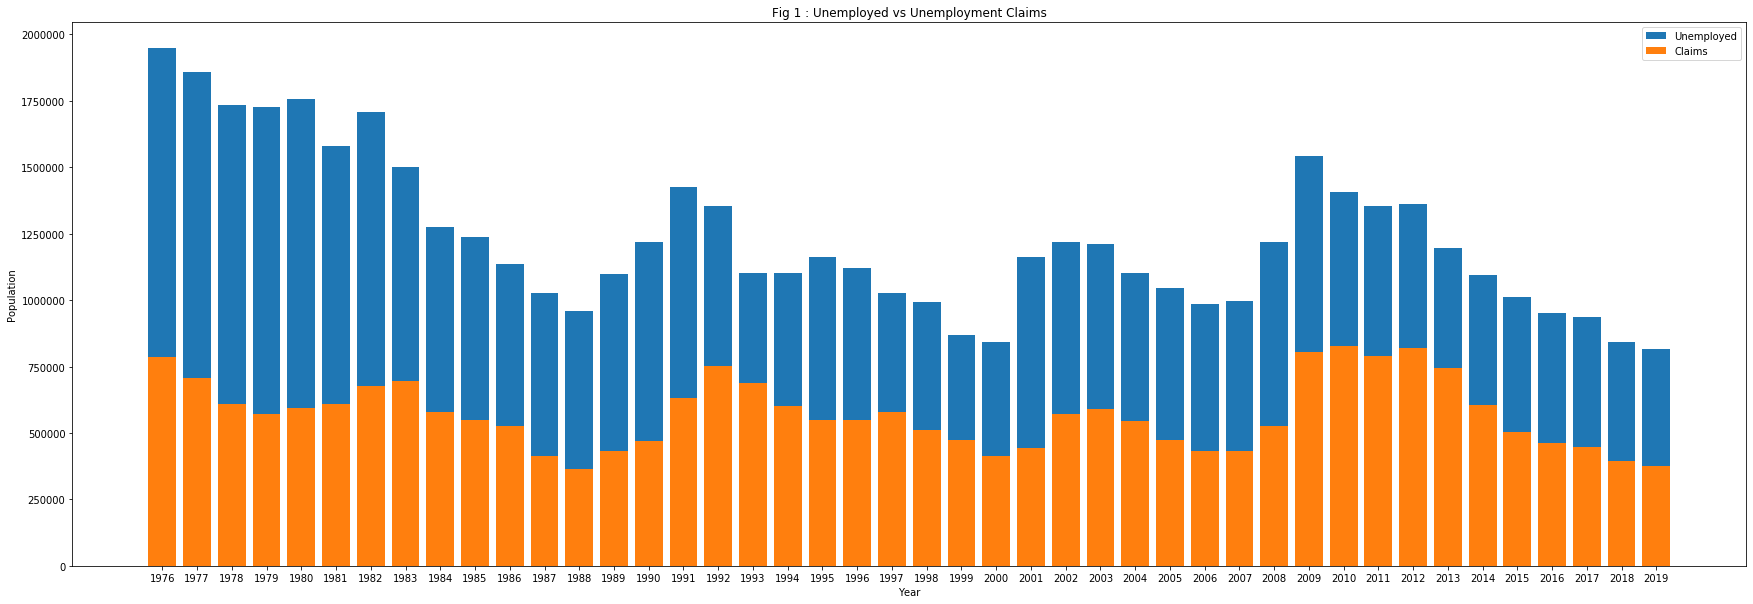

In [32]:
plt.figure(  figsize = (30,10) )
plt.bar(year,claims)
plt.bar(year,unemployed)
plt.xticks(year)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(['Unemployed','Claims'])
plt.title('Fig 1 : Unemployed vs Unemployment Claims')
plt.show() 

In [33]:
pip install --upgrade pingouin

Requirement already up-to-date: pingouin in c:\programdata\anaconda3\lib\site-packages (0.3.4)
Note: you may need to restart the kernel to use updated packages.


In [34]:
import pingouin as pg               #REF : https://raphaelvallat.com/correlation.html
pg.corr(x=claims, y=unemployed)  # the strength of the linear relationship between two variables

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,44,0.687438,"[0.49, 0.82]",0.472571,0.446843,2.543980e-07,7.104e+04,0.999755


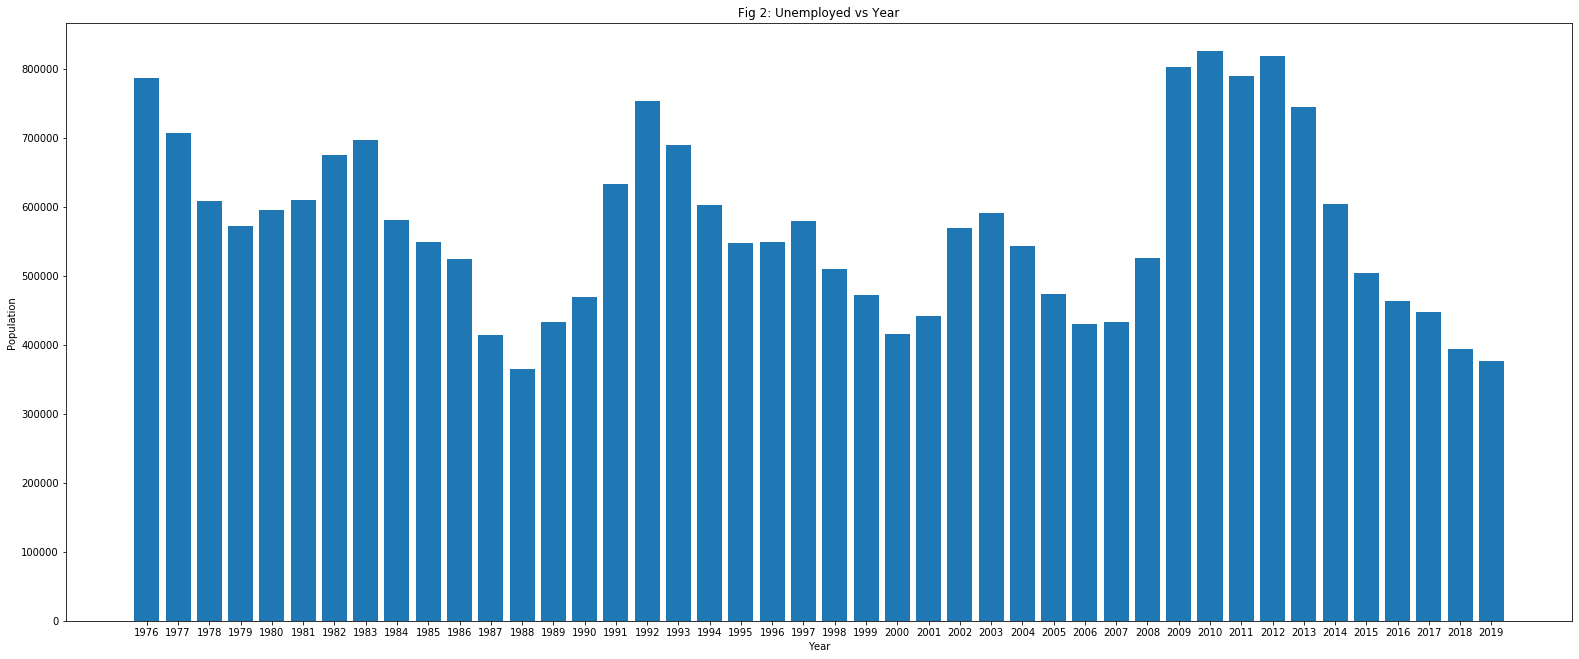

In [35]:
plt.figure(  figsize = (27,11) )
plt.bar(year,unemployed)
plt.xticks(year)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Fig 2: Unemployed vs Year')
plt.show() 

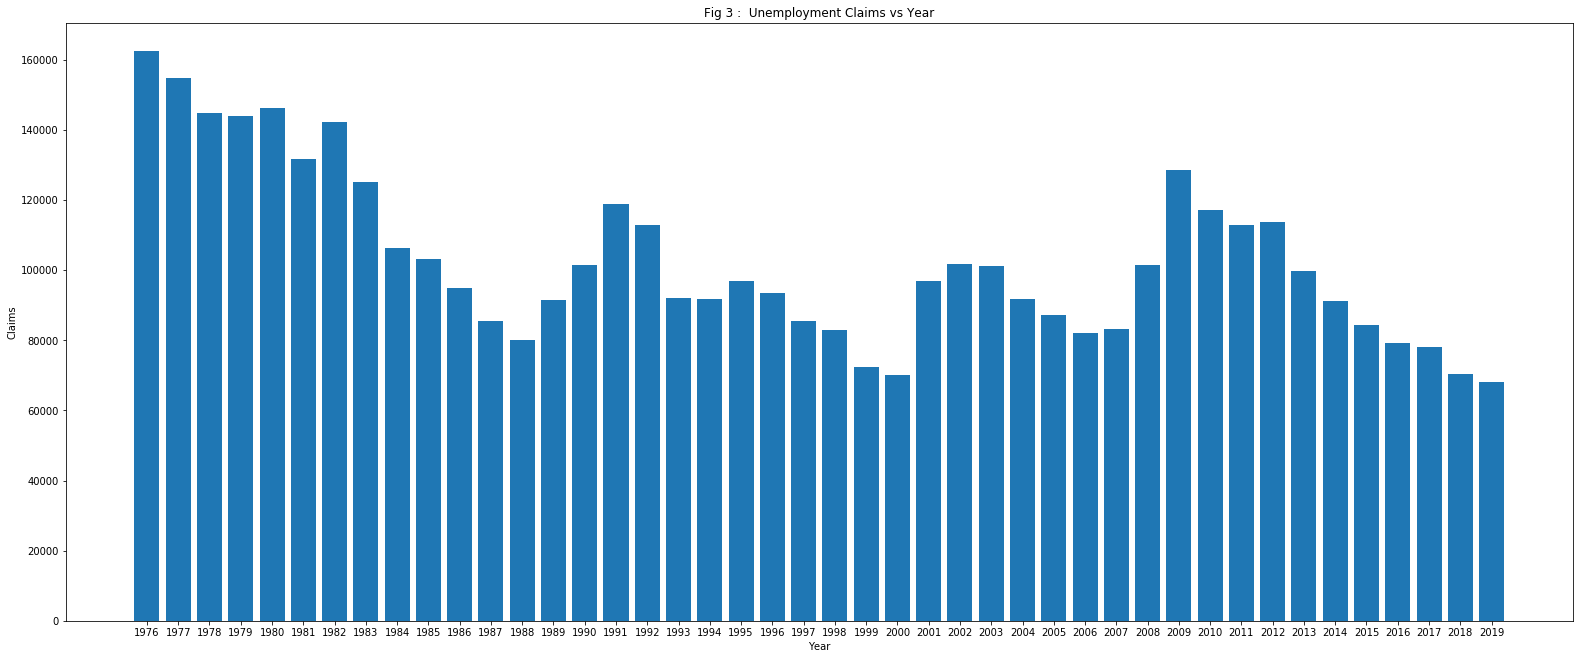

In [36]:
plt.figure(  figsize = (27,11) )
plt.bar(year,claim)
plt.xticks(year)
plt.xlabel('Year')
plt.ylabel('Claims')
plt.title('Fig 3 :  Unemployment Claims vs Year')
plt.show() 

As we can see from the graph and the correlation coefficient of 0.69, the unemployment claims are proportionally related to unemployed people.

## Hypothesis 2: The Year having maximum/minimum Unemployment rate will have maximum/minimum unemployment insurance claims.

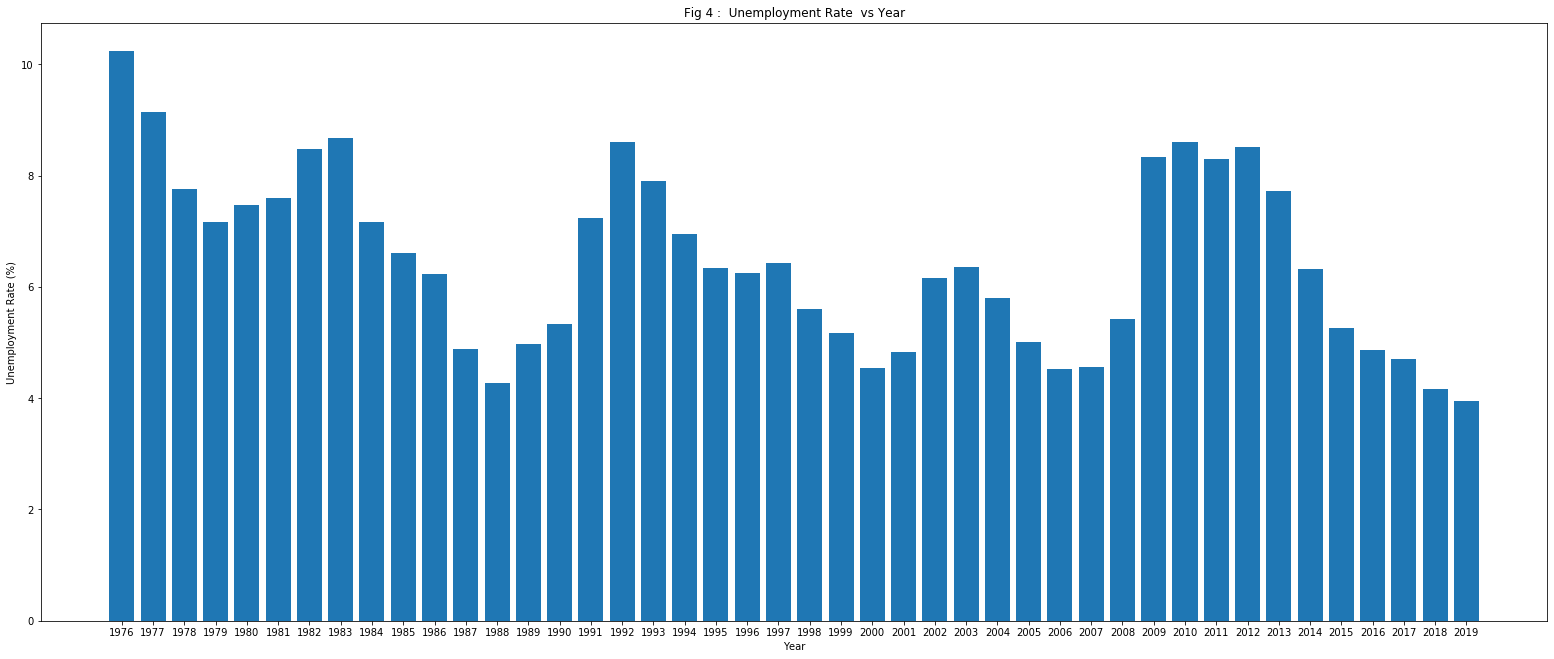

In [37]:
plt.figure(  figsize = (27,11) )
plt.bar(year,unemp_rate)
plt.xticks(year)
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Fig 4 :  Unemployment Rate  vs Year')
plt.show() 

In [38]:
print('Highest Unemployment Rate , Unemployment claims in Year 1976',mean(df3[df3['Year']== 1976]['Unemployment Rate']),mean(df3[df3['Year']== 1976]['Initial Claims']))

Highest Unemployment Rate , Unemployment claims in Year 1976 10.233333333333333 162390.5


In [39]:
df3[df3['Year'] == 1976]

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,Initial Claims
519,New York State,1976,12,7650700,6888900,761700,10.0,203876
520,New York State,1976,11,7667000,6884700,782300,10.2,170488
521,New York State,1976,10,7664400,6908400,756000,9.9,149468
522,New York State,1976,9,7619200,6846800,772400,10.1,145872
523,New York State,1976,8,7895600,7089100,806600,10.2,144529
524,New York State,1976,7,7970700,7131300,839400,10.5,180539
525,New York State,1976,6,7801000,7006500,794500,10.2,166278
526,New York State,1976,5,7561800,6884300,677500,9.0,140636
527,New York State,1976,4,7599200,6855400,743800,9.8,149279
528,New York State,1976,3,7622800,6819300,803500,10.5,162010


In [40]:
print('Lowest Unemployment Rate , Unemployment claims in Year 1976',mean(df3[df3['Year']== 1988]['Unemployment Rate']),mean(df3[df3['Year']== 1988]['Initial Claims']))

Lowest Unemployment Rate , Unemployment claims in Year 1976 4.275 79953.33333333333


In [41]:
df3[df3['Year'] == 1988]

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,Initial Claims
375,New York State,1988,12,8581900,8195600,386300,4.5,112905
376,New York State,1988,11,8599700,8222500,377300,4.4,87143
377,New York State,1988,10,8587300,8221000,366300,4.3,65816
378,New York State,1988,9,8526500,8162700,363800,4.3,61523
379,New York State,1988,8,8713200,8344400,368800,4.2,67451
380,New York State,1988,7,8743600,8372000,371600,4.2,83948
381,New York State,1988,6,8621000,8291500,329400,3.8,79686
382,New York State,1988,5,8435000,8101000,333900,4.0,65994
383,New York State,1988,4,8409500,8103300,306200,3.6,75905
384,New York State,1988,3,8421700,8057500,364200,4.3,78842


The graph and the values shows that the year having maximum/minimum Unemployment rate has maximum/minimum unemployment insurance claims.

## Question 1: In which season(part of the year) the unployment rate and claims are highest for the last 30 years?

In [42]:
#Calculating Means for each month
unemployed=[]
claims = []
unemp_rate=[]
for m in month:
    mdf = df3[df3['Month'] == m]
    claims.append(mean(mdf['Initial Claims']))
    unemployed.append(mean(mdf.Unemployed))
    unemp_rate.append(mean(mdf['Unemployment Rate']))

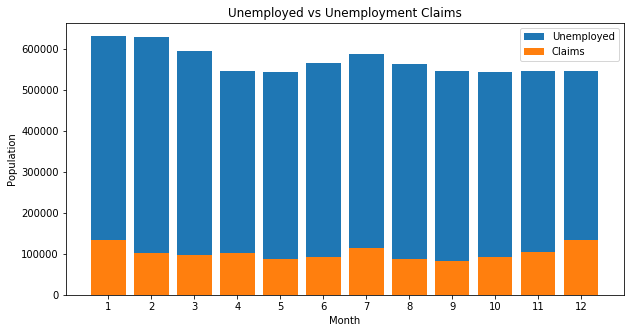

In [43]:
plt.figure(  figsize = (10,5) )
plt.bar(month,unemployed)
plt.bar(month,claims)
plt.xticks(month)
plt.xlabel('Month')
plt.ylabel('Population')
plt.legend(['Unemployed','Claims'])
plt.title('Unemployed vs Unemployment Claims')
plt.show() 

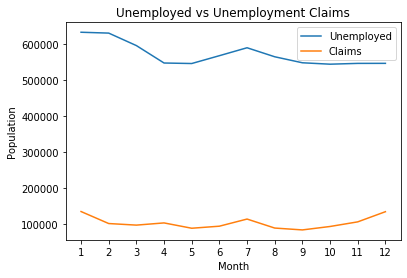

In [44]:
plt.plot(month,unemployed)
plt.plot(month,claims)
plt.xticks(month)
plt.xlabel('Month')
plt.ylabel('Population')
plt.legend(['Unemployed','Claims'])
plt.title('Unemployed vs Unemployment Claims')
plt.show() 

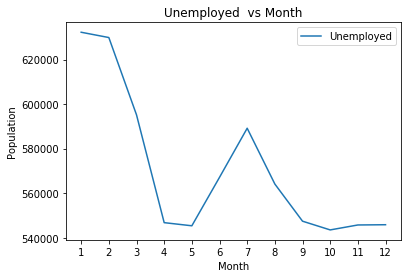

In [45]:
plt.plot(month,unemployed)
plt.xticks(month)
plt.xlabel('Month')
plt.ylabel('Population')
plt.legend(['Unemployed'])
plt.title('Unemployed  vs Month')
plt.show() 

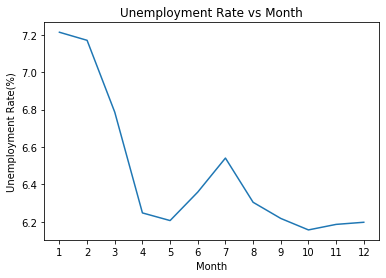

In [46]:
plt.plot(month,unemp_rate)
plt.xticks(month)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate(%)')
plt.title('Unemployment Rate vs Month')
plt.show() 

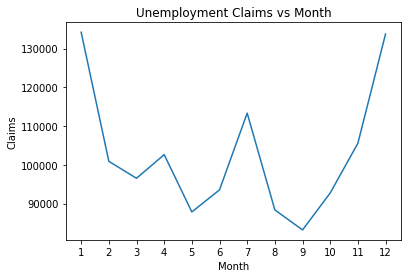

In [47]:
plt.plot(month,claims)
plt.xticks(month)
plt.xlabel('Month')
plt.ylabel('Claims')
plt.title('Unemployment Claims vs Month')
plt.show() 

The umployment claims is highest during winter period.
It starts increasing at the year end till feb.
Wheresas, the unemployment and unemployment rate  is maximum in january.

## Documentation on cleaning and tidying

1) Checked null values (No null values).

2) Checked range of values(Valid values).

3) Renamed Columns to appropriate names. 

4) Removed Duplicate data.

5) Changed date column to month and year for merging the data.

6) Converted datatype to match its meaning.

Column 'Period Ending' Changed To 'Month' and 'Year'. 

I learned :
    how to analyse the data using various methods,
    the whole process of Cleaning  the data,
    how to choose suitable visualisation and applying it to the data.  
    How to relate two variable using graph and math.
    